In [20]:
"""
PRESS SHIFT + ENTER TO RUN INDIVIDUAL CELL

LOAD TREATY DATA
THE FIRST NAME VARIABLE IS FOR THE IEA TREATY DATA
THE SECOND NAME VARIABLE IS FOR THE ECOLEX DATA; IF YOU WOULD LIKE TO LOAD OTHER DATA
CHANGE THE VALUE OF THE SECOND NAME VARIABLE
EVERYTHING THAT MATCHES FROM THE START TILL THE END OF THE NAME VARIABLE WILL BE LOADED
EXAMPLE:
name = "Fuzzy Search Treaty Names Outcomes Resolution" WILL LOAD
Fuzzy Search Treaty Names Outcomes Resolutions Batch 1.csv
Fuzzy Search Treaty Names Outcomes Resolutions Batch 2.csv
Fuzzy Search Treaty Names Outcomes Resolutions Batch 3.csv
Fuzzy Search Treaty Names Outcomes Resolutions Batch 4.csv
"""
import pandas as pd
from os import listdir 
import numpy as np
from operator import itemgetter



folder = "output data/"
name = "Fuzzy Search Treaty Names Outcomes Stata"

df_stata = pd.DataFrame()


for file in listdir(folder):
    if file[:len(name)] == name:
        df_new = pd.read_csv(folder + file, index_col = 0)
        df_cols = list(df_new.columns)
        df_cols = sorted(df_cols)
        df_new = df_new[df_cols]
        df_stata = df_stata.append(df_new)

        
print("Loaded DataFrame Successfully")
print(df_stata.shape)


folder = "output data/"
name = "Fuzzy Search Treaty Names Outcomes Resolution"

df_decisions = pd.DataFrame()


for file in listdir(folder):
    if file[:len(name)] == name:
        df_new = pd.read_csv(folder + file, index_col = 0)
        df_cols = list(df_new.columns)
        df_cols = sorted(df_cols)
        df_new = df_new[df_cols]
        df_decisions = df_decisions.append(df_new)

        
print("Loaded DataFrame Successfully")
print(df_decisions.shape)

Loaded DataFrame Successfully
(795, 769)
Loaded DataFrame Successfully
(887, 769)


In [12]:
"""
CREATE IEA NETWORK
CREATES NETWORK OF IEA DATA
"""
import networkx as nx
from random import randint

CUT_OFF_VALUE = 0.7

#load stata data to convert treaty numbers to treaty names
meta_stata = pd.read_csv("IEA Meta Data.csv")
meta_nums = meta_stata["iea_id"]
meta_names = meta_stata["treatyname"]
meta_dict = {}
for name, num in zip(meta_nums, meta_names):
    meta_dict[name] = num
    
#rename rows with their names instead of their associated number
df_stata = df_stata.rename(index=meta_dict)


#add nodes and get names
Stata_Net = nx.DiGraph()
Stata_Net.add_nodes_from(df_stata.columns)
treaty_names = list(df_stata.columns)


df_stata = df_stata.reset_index().drop_duplicates(subset = "index", keep = "first")
df_stata = df_stata.set_index("index")
print(df_stata.shape)
for n, treaty in enumerate(df_stata.index):
    Stata_Net.add_node(treaty)
    val_list = df_stata.loc[treaty]
    

    try:
        for num, val in enumerate(val_list):
            if eval(val)[0] > CUT_OFF_VALUE:
                Stata_Net.add_edge(treaty, treaty_names[num])
    except: #sometimes a nan comes, so it doesn#t throw an error
        print("Could not load: ", val)
        pass
                

print(Stata_Net)

(768, 769)
DiGraph with 770 nodes and 1958 edges


In [ ]:
"""
IEA NETWORK VISUALIZATION
RUN TO VISUALIZE IEA DATA
WILL OPEN NEW WINDOW WITH THE NETWORK VISUALIZATION AND SAVE A HTML FILE CALLED Viz Net.html WITH IT
CHANGE net_viz.show("Viz Net.html") THE INPUT BETWEEN QUOTES TO CHANGE SAVING NAME
"""
#remove edges that lead to oneself
edge_liste = []
for edge in Stata_Net.edges:
    a,b = edge[0], edge[1]
    if a == b:
        edge_liste.append(edge)
Stata_Net.remove_edges_from(edge_liste)
#remove isolated nodes
Stata_Net.remove_nodes_from(list(nx.isolates(Stata_Net)))


print("number of nodes and edges after removing isolated nodes: ", Stata_Net)
nx.draw(Stata_Net)
#create network visualization
from pyvis.network import Network
net_viz= Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
for node in Stata_Net.nodes:
    net_viz.add_node(node, label = node)
    
for edge in Stata_Net.edges:
    net_viz.add_edge(edge[0], edge[1])
print("successful")
net_viz.barnes_hut()
net_viz.show("Viz Net.html")

In [ ]:
"""
CREATE ECOLEX NETWORK 
CREATES NETWORK WITH ECOLEX DATA LOADED; OR WHICHEVER DATA WAS LOADED
"""

import networkx as nx
from random import randint

CUT_OFF_VALUE = 0.7
TREATY_EDGE_VAL = 100



#add nodes and get names
Decisions_Net = nx.DiGraph()
Decisions_Net.add_nodes_from(df_decisions.columns)
treaty_names = list(df_decisions.columns)


#remove duplicates
df_decisions = df_decisions.reset_index().drop_duplicates(subset = "index", keep = "first")
df_decisions = df_decisions.set_index("index")
print(df_decisions.shape)
#create network by looping over rows, checking the according column value and create a node/edge to node.
for n, treaty in enumerate(df_decisions.index):
    Decisions_Net.add_node(treaty)
    val_list = df_decisions.loc[treaty]
    

    try:
        for num, val in enumerate(val_list):
            if eval(val)[0] > CUT_OFF_VALUE:
                Decisions_Net.add_edge(treaty, treaty_names[num], weight = TREATY_EDGE_VAL)
    except: #sometimes a nan comes, so it doesn#t throw an error
        print("Could not load: ", val)
        pass
                

print(Decisions_Net)

In [ ]:
"""
ECOLEX NETWORK VISUALIZATION
RUN TO VISUALIZE ECOLEX DATA
WILL OPEN NEW WINDOW WITH THE NETWORK VISUALIZATION AND SAVE A HTML FILE CALLED Viz Net.html WITH IT
CHANGE net_viz.show("Viz Net.html") THE INPUT BETWEEN QUOTES TO CHANGE SAVING NAME
"""
#remove edges that lead to oneself
edge_liste = []
for edge in Decisions_Net.edges:
    a,b = edge[0], edge[1]
    if a == b:
        edge_liste.append(edge)
Decisions_Net.remove_edges_from(edge_liste)
#remove isolated nodes
Decisions_Net.remove_nodes_from(list(nx.isolates(Decisions_Net)))


print("number of nodes and edges after removing isolated nodes: ", Decisions_Net)
nx.draw(Decisions_Net)
#visualize network
from pyvis.network import Network
net_viz= Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
for node in Decisions_Net.nodes:
    net_viz.add_node(node, label = node)
    
for edge in Decisions_Net.edges:
    net_viz.add_edge(edge[0], edge[1])
print("successful")
net_viz.barnes_hut()
net_viz.show("Viz Net.html")

In [6]:
"""
CREATE ECOLEX NETWORK WITH MAIN TREATIES 1/2
CREATES A NETWORK WITH NOT ALL THE TREATIES AND TREATY DECISIONS LOADED
BUT ONLY THE MAIN ONES, WHICH ALL THE TREATY DECISIONS BELONG TO
"""

#load meta data
"""
Find Unique Treaties
"""

df_meta_decisions = pd.read_csv("RE__MEA_membership_data/Meta Data Treaty Decisions.csv", index_col = 0)
#drop duplicates
df_meta_decisions.drop_duplicates(inplace = True)

counter = 0
names = list(df_meta_decisions["Filename"])
treaties = list(df_meta_decisions["Treaty"])
connection_dict = {} #a dictionary with the decision and the according treaty it belongs to
for num, treaty in enumerate(treaties):
    connection_dict[names[num]] = treaty
    if treaty != "No Data":
        counter += 1
print(f"{counter} out of {num} did have treaty data")

#check for unique treaty names
unique_treaties = []
for key in connection_dict:
    if connection_dict[key] in unique_treaties:
        continue
    else:
        unique_treaties.append(connection_dict[key])

print(f"Found {len(unique_treaties) -1 } Unique Treaties")



11759 out of 12100 did have treaty data
Found 33 Unique Treaties


In [7]:
"""
CREATE DECISION NETWORK WITH MAIN TREATIES 2/2
"""



import networkx as nx
from random import randint
import regex as re

CUT_OFF_VALUE = 0.7
WEIGHT_FACTOR = 1

Net_treaty_dec = nx.DiGraph()
#add all treaties to graph
for key, item in connection_dict.items():
    Net_treaty_dec.add_node(item)
print(Net_treaty_dec)

#loop over rows of treaty decisions
for n, treaty_dec in enumerate(df_decisions.index):
    
    val_list = df_decisions.loc[treaty_dec] #get the according values to their treaties
    
    for num, val in enumerate(val_list):
        if eval(val)[0] > CUT_OFF_VALUE: #check if value crosses threshold
            #add an edge between the decisions' according treaty and the other treaty
            try:
                #look if the edge is already there, then add weight to current weight, otherwise create the edge and add base weight
                weight_existing = Net_treaty_dec.get_edge_data(connection_dict[treaty_dec], list(df_decisions)[num], default = 0)
                if weight_existing == 0:
                    Net_treaty_dec.add_edge(connection_dict[treaty_dec], list(df_decisions)[num], weight = WEIGHT_FACTOR)
                elif weight_existing:
                    weight_existing = weight_existing["weight"]
                    Net_treaty_dec.add_edge(connection_dict[treaty_dec], list(df_decisions)[num], weight = WEIGHT_FACTOR + weight_existing)
                else:
                    Net_treaty_dec.add_edge(connection_dict[treaty_dec], list(df_decisions)[num], weight = WEIGHT_FACTOR)

            except:
                #try deleting the date in front and search again
                treaty_dec = treaty_dec[treaty_dec.find(",")+7:]
                
                weight_existing = Net_treaty_dec.get_edge_data(connection_dict[treaty_dec], list(df_decisions)[num], default = 0)
                if weight_existing == 0:
                    Net_treaty_dec.add_edge(connection_dict[treaty_dec], list(df_decisions)[num], weight = WEIGHT_FACTOR)
                elif weight_existing:
                    weight_existing = weight_existing["weight"]
                    Net_treaty_dec.add_edge(connection_dict[treaty_dec], list(df_decisions)[num], weight = WEIGHT_FACTOR + weight_existing)
                else:
                    Net_treaty_dec.add_edge(connection_dict[treaty_dec], list(df_decisions)[num], weight = WEIGHT_FACTOR)

            

print(Net_treaty_dec)
 

DiGraph with 34 nodes and 0 edges
DiGraph with 119 nodes and 150 edges


successful


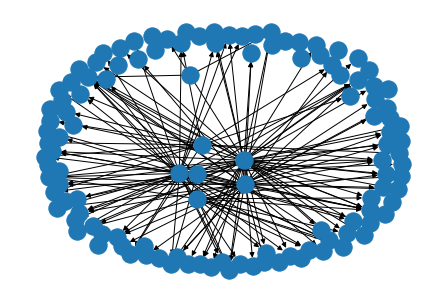

In [8]:
"""
VISAULIZE NETWORK WITH TREATIES AT HEART
WILL OPEN NEW WINDOW WITH THE NETWORK VISUALIZATION AND SAVE A HTML FILE CALLED Viz Net.html WITH IT
CHANGE net_viz.show("Viz Net.html") THE INPUT BETWEEN QUOTES TO CHANGE SAVING NAME
"""

nx.draw(Net_treaty_dec)


net_viz= Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
for node in Net_treaty_dec.nodes:
    if node in unique_treaties:
        net_viz.add_node(node, label = node, color = "red")
    else:
        net_viz.add_node(node, label = node, color = "blue")
        
for edge in Net_treaty_dec.edges:
    net_viz.add_edge(edge[0], edge[1])
print("successful")
net_viz.barnes_hut()
net_viz.show("Viz Net.html")

In [9]:
"""
add dictionary with translation of treaty names from ecolex to iea
"""
ecolex_iea_conversion_dict = {
    "Convention on Wetlands of International Importance especially as Waterfowl Habitat (Feb 2, 1971)": "Convention On Wetlands Of International Importance Especially As Waterfowl Habitat",
    "Cartagena Protocol on Biosafety to the Convention on Biological Diversity (Jan 29, 2000)":"Cartagena Protocol on Biosafety to the Convention On Biological Diversity",
    "Nagoya Protocol on Access to Genetic Resources and their Fair and Equitable Sharing of Benefits Arising from their Utilization to the Convention on Biological Diversity (Oct 29, 2010)":"Nagoya Protocol on Access to Genetic Resources and the Fair and Equitable Sharing of Benefits Arising from their Utilization to the Convention on Biological Diversity",
    "Convention on Biological Diversity (Jun 5, 1992)":"Convention On Biological Diversity",
    #missing the North East Atlantic and Irish Sea, could not find that in IEA
    "Agreement on the Conservation of Small Cetaceans of the Baltic, North East Atlantic, Irish and North Seas (Mar 17, 1992)":"Amendment to the Agreement on the Conservation of Small Cetaceans of the Baltic and North Seas",
    "Convention on the Conservation of Migratory Species of Wild Animals (Jun 23, 1979)":"Convention On The Conservation Of Migratory Species Of Wild Animals",
    "Bamako Convention on the Ban of the Import into Africa and the Control of Transboundary Movement and Management of Hazardous Wastes within Africa (Jan 30, 1991)":"Convention On The Ban Of The Import Into Africa And The Control Of Transboundary Movement And Management Of Hazardous Wastes Within Africa",
    "Paris Agreement (Dec 12, 2015)":"Paris Agreement under the United Nations Framework Convention on Climate Change",
    "United Nations Framework Convention on Climate Change (May 9, 1992)":"United Nations Framework Convention On Climate Change",
    "Minamata Convention on Mercury (Oct 10, 2013)":"Minamata Convention on Mercury",
    "Rotterdam Convention on the Prior Informed Consent Procedure for Certain Hazardous Chemicals and Pesticides in International Trade (Sep 10, 1998)":"Convention On The Prior Informed Consent Procedure For Certain Hazardous Chemicals And Pesticides In International Trade",
    "United Nations Convention to Combat Desertification in those Countries Experiencing Serious Drought and/or Desertification, particulary in Africa (Jun 17, 1994)":"Convention To Combat Desertification In Those Countries Experiencing Serious Drought And/Or Desertification, Particularly In Africa",
    "Stockholm Convention on Persistent Organic Pollutants (May 22, 2001)":"Convention On Persistent Organic Pollutants",
    "Basel Convention on the Control of Transboundary Movements of Hazardous Wastes and their Disposal (Mar 22, 1989)":"Convention On The Control Of Transboundary Movements Of Hazardous Wastes And Their Disposal",
    "Agreement on the Conservation of African-Eurasian Migratory Waterbirds (Jun 16, 1995)":"Agreement On The Conservation Of African-Eurasian Migratory Waterbirds",
    "Framework Convention on the Protection and Sustainable Development of the Carpathians (May 22, 2003)":"Framework Convention on the Protection and Sustainable Development of the Carpathians",
    "Kyoto Protocol to the United Nations Framework Convention on Climate Change (Dec 11, 1997)":"United Nations Framework Convention On Climate Change",
    "Montreal Protocol on Substances that Deplete the Ozone Layer (Sep 16, 1987)":"Montreal Protocol On Substances That Deplete The Ozone Layer",
    "Vienna Convention for the Protection of the Ozone Layer (Mar 22, 1985)":"Convention For The Protection Of The Ozone Layer",
    "International Treaty on Plant Genetic Resources for Food and Agriculture (Nov 3, 2001)":"International Treaty On Plant Genetic Resources For Food And Agriculture",
    "Convention on International Trade in Endangered Species of Wild Fauna and Flora (Mar 3, 1973)":"Convention On International Trade In Endangered Species Of Wild Fauna And Flora",
    "Convention concerning the Protection of the World Cultural and Natural Heritage (Nov 23, 1972)":"Convention For The Protection Of The World Cultural And Natural Heritage",
    "Convention for the Protection and Development of the Marine Environment of the Wider Caribbean Region (Mar 24, 1983)":"Convention For The Protection And Development Of The Marine Environment Of The Wider Caribbean Region",
    "Protocol concerning Pollution from Land-Based sources and activities to the Convention for the Protection and Development of the Marine Environment of the Wider Caribbean Region (Oct 6, 1999)":"Protocol Concerning Pollution From Land-Based Sources And Activities to the Convention for the Protection and Development of the Marine Environment of the Wider Caribbean Region",
    "Protocol Concerning Specially Protected Areas and Wildlife to the Convention for the Protection and Development of the Marine Environment of the Wider Caribbean Region (Jan 18, 1990)":"Protocol Concerning Specially Protected Areas and Wildlife to the Convention for the Protection and Development of the Marine Environment of the Wider Caribbean Region",
    "Protocol concerning cooperation in preventing pollution from ships and, in cases of emergency combating pollution of the Mediterranean Sea (Jan 25, 2002)":"Protocol Concerning Cooperation In Preventing Pollution From Ships And, In Cases Of Emergency, Combating Pollution Of The Mediterranean Sea",
    "Convention for Co-operation in the Protection and Development of the Marine and Coastal Environment of the West and Central African Region (Mar 23, 1981)":"Convention For Cooperation In The Protection And Development Of The Marine And Coastal Environment Of The West And Central African Region",
    "Protocol Concerning Specially Protected Areas and Biological Diversity in the Mediterranean (Jun 10, 1995)":"Protocol Concerning Specially Protected Areas And Biological Diversity In The Mediterranean",
    "Agreement on the Conservation of European Bats (Dec 4, 1991)":"Agreement On The Conservation Of Populations of European Bats",
    "Protocol on the Prevention of Pollution of the Mediterranean Sea by Transboundary Movements of Hazardous Wastes and their Disposal (Oct 1, 1996)":"Protocol On The Prevention Of Pollution Of The Mediterranean Sea By Transboundary Movements Of Hazardous Wastes And Their Disposal",
    "Convention for the Protection of the Mediterranean Sea against Pollution (Feb 16, 1976)":"Convention For The Protection Of The Mediterranean Sea Against Pollution",
    "Protocol for the protection of the Mediterranean Sea against pollution resulting from exploration and exploitation of the continental shelf and the seabed and its subsoil (Oct 14, 1994)":"Protocol For The Protection Of The Mediterranean Sea Against Pollution Resulting From Exploration And Exploitation Of The Continental Shelf And The Seabed And Its Subsoil",
    "Protocol for the Protection of the Mediterranean Sea against Pollution from Land-Based Sources (May 17, 1980)":"Protocol For The Protection Of The Mediterranean Sea Against Pollution From Land-Based Sources"
}


"""
Missing:
No Data
"""

'\nMissing:\nNo Data\n'

In [10]:
"""
MERGE NETWORKS OF IEA AND ECOLEX
"""

#relabel decision treaty nodes according to dict above
Net_treaty_dec = nx.relabel_nodes(Net_treaty_dec, ecolex_iea_conversion_dict)

#merge networks
merged_net = nx.compose(Net_treaty_dec, Stata_Net)

In [11]:
print(merged_net)

DiGraph with 572 nodes and 1433 edges


In [13]:
"""
ADD YEARS TO TREATIES NETWORK
ADDS TREATY IN SPECIFIC YEAR WHICH THEY WERE CREATED TO EACH NETWORK YEAR OF THE TREATY
ALLOWS FOR TEMPORAL SPACE
"""
#only use treaty when it is its year


#Global Variables
CUT_OFF_VALUE = 0.7
YEAR_RANGE = list(range(1970, 2020)) #excludes last value

ECOLEX_LIST_OF_TREATY_NETWORKS = []


#load meta data with information on the year 
df_decision_meta = pd.read_csv("RE__MEA_membership_data/Meta Data Treaty Decisions.csv")
decision_year_dict = {}

#add year information on the column names
year_decision_meta = dict(zip(df_decision_meta["Filename"], df_decision_meta["Date"]))
for key, item in year_decision_meta.items():
    year_decision_meta[key] = item[-4:]
    
    
    
    
#loop over years to create network for each year

for year in YEAR_RANGE:
    Net_treaty_dec = nx.DiGraph()
    #add all treaties to graph
    for key, item in connection_dict.items():
        Net_treaty_dec.add_node(item)

    #loop over rows of treaty decisions
    for n, treaty_dec in enumerate(df_decisions.index):
        #check if it is the year of the decision
        try:
            if year_decision_meta[treaty_dec] != str(year):
                continue
        except: #maybe name has to be altered, with the deleted date
            temp_treaty_dec = treaty_dec[treaty_dec.find(",")+7:]
            if year_decision_meta[temp_treaty_dec] != str(year):
                continue

        
        val_list = df_decisions.loc[treaty_dec] #get the according values to their treaties

        for num, val in enumerate(val_list):
            if eval(val)[0] > CUT_OFF_VALUE: #check if value crosses threshold
                #add an edge between the decisions according treaty and the other treaty
                try:
                    Net_treaty_dec.add_edge(connection_dict[treaty_dec], list(df_decisions)[num])
                except:
                    #try deleting the date in front and search again
                    treaty_dec = treaty_dec[treaty_dec.find(",")+7:]
                    Net_treaty_dec.add_edge(connection_dict[treaty_dec], list(df_decisions)[num])
    print(year, ": ", Net_treaty_dec)
    ECOLEX_LIST_OF_TREATY_NETWORKS.append(Net_treaty_dec)
            


1970 :  DiGraph with 34 nodes and 0 edges
1971 :  DiGraph with 34 nodes and 0 edges
1972 :  DiGraph with 34 nodes and 0 edges
1973 :  DiGraph with 34 nodes and 0 edges
1974 :  DiGraph with 34 nodes and 0 edges
1975 :  DiGraph with 34 nodes and 0 edges
1976 :  DiGraph with 34 nodes and 0 edges
1977 :  DiGraph with 34 nodes and 0 edges
1978 :  DiGraph with 34 nodes and 0 edges
1979 :  DiGraph with 34 nodes and 0 edges
1980 :  DiGraph with 34 nodes and 0 edges
1981 :  DiGraph with 34 nodes and 0 edges
1982 :  DiGraph with 34 nodes and 0 edges
1983 :  DiGraph with 34 nodes and 0 edges
1984 :  DiGraph with 34 nodes and 0 edges
1985 :  DiGraph with 35 nodes and 1 edges
1986 :  DiGraph with 34 nodes and 0 edges
1987 :  DiGraph with 36 nodes and 2 edges
1988 :  DiGraph with 35 nodes and 1 edges
1989 :  DiGraph with 34 nodes and 0 edges
1990 :  DiGraph with 36 nodes and 2 edges
1991 :  DiGraph with 34 nodes and 0 edges
1992 :  DiGraph with 34 nodes and 0 edges
1993 :  DiGraph with 35 nodes and 

In [14]:
"""
ADD YEARS TO IEA NETWORK
ADDS TREATY IN SPECIFIC YEAR WHICH THEY WERE CREATED TO EACH NETWORK YEAR OF THE TREATY
ALLOWS FOR TEMPORAL SPACE
"""
import fuzzyset
#load meta data with information on the year 
df_stata_meta = pd.read_csv("Meta_Data_Stata.csv")
stata_year_dict = {}

STATA_LIST_OF_TREATY_NETWORKS = []


#add year information on the column names
stata_year_dict = dict(zip(df_stata_meta["treatyname"], df_stata_meta["teif"]))
for key, item in stata_year_dict.items():
    if int(item[-2:]) < 20:
        item = str(20) + item[-2:]
    else:
        item = str(19) + item[-2:]
    stata_year_dict[key] = item
    

    
    
    
CUT_OFF_VALUE = 0.7

#load stata data to convert treaty numbers to treaty names
meta_stata = pd.read_csv("RE__MEA_membership_data/IEA_Meta_Data.csv")
meta_nums = meta_stata["iea_id"]
meta_names = meta_stata["treatyname"]
meta_dict = {}
for name, num in zip(meta_nums, meta_names):
    meta_dict[name] = num
    
#rename rows with their names instead of their associated number
df_stata = df_stata.rename(index=meta_dict)


for year in YEAR_RANGE:
    
    #add nodes and get names
    Stata_Net = nx.DiGraph()
    Stata_Net.add_nodes_from(df_stata.columns)
    treaty_names = list(df_stata.columns)


    df_stata = df_stata.reset_index().drop_duplicates(subset = "index", keep = "first")
    df_stata = df_stata.set_index("index")
    for n, treaty in enumerate(df_stata.index):
        Stata_Net.add_node(treaty)
        val_list = df_stata.loc[treaty]

        #skip if it is not the year of the treaty
        try:
            if stata_year_dict[treaty] != str(year):
                continue
        except:
            #if the treaty could not be found, take the next best treaty
            best_match = [(0, "Hey")]
            Search_Query = fuzzyset.FuzzySet()
            Search_Query.add(treaty)
            for treaty_og in list(df_stata_meta["treatyname"]):
                outcome = Search_Query.get(treaty_og)
                
                if outcome[0][0] > best_match[0][0]:
                    best_match = [(outcome[0][0], treaty_og)]
           
            if stata_year_dict[best_match[0][1]] != str(year):
                continue
            else:
                print(f"The treaty {treaty} was exchanged by {best_match[0][1]}")
                
                
        try:
            for num, val in enumerate(val_list):
                if eval(val)[0] > CUT_OFF_VALUE:
                    Stata_Net.add_edge(treaty, treaty_names[num])
        except: #sometimes a nan comes, so it doesn#t throw an error
            print("Could not load: ", val)
            pass

    STATA_LIST_OF_TREATY_NETWORKS.append(Stata_Net)
    print(year, ": ", Stata_Net)
    

1970 :  DiGraph with 770 nodes and 3 edges
1971 :  DiGraph with 770 nodes and 27 edges
1972 :  DiGraph with 770 nodes and 6 edges
1973 :  DiGraph with 770 nodes and 3 edges
1974 :  DiGraph with 770 nodes and 27 edges
1975 :  DiGraph with 770 nodes and 23 edges
1976 :  DiGraph with 770 nodes and 12 edges
1977 :  DiGraph with 770 nodes and 8 edges
1978 :  DiGraph with 770 nodes and 36 edges
1979 :  DiGraph with 770 nodes and 24 edges
1980 :  DiGraph with 770 nodes and 6 edges
1981 :  DiGraph with 770 nodes and 9 edges
1982 :  DiGraph with 770 nodes and 22 edges
1983 :  DiGraph with 770 nodes and 31 edges
1984 :  DiGraph with 770 nodes and 22 edges
1985 :  DiGraph with 770 nodes and 13 edges
1986 :  DiGraph with 770 nodes and 30 edges
1987 :  DiGraph with 770 nodes and 18 edges
1988 :  DiGraph with 770 nodes and 22 edges
1989 :  DiGraph with 770 nodes and 10 edges
1990 :  DiGraph with 770 nodes and 19 edges
1991 :  DiGraph with 770 nodes and 25 edges
1992 :  DiGraph with 770 nodes and 33 

In [15]:
"""
COMBINE BOTH TREATY NETWORK YEAR LISTS TO ONE
"""
combined_nets = []
for num, (Stata_Net, ECOLEX_Net) in enumerate(zip(STATA_LIST_OF_TREATY_NETWORKS, ECOLEX_LIST_OF_TREATY_NETWORKS)):

    #relabel decision treaty nodes according to dict above
    ECOLEX_Net = nx.relabel_nodes(ECOLEX_Net, ecolex_iea_conversion_dict)

    #merge networks
    merged_net = nx.compose(Stata_Net, ECOLEX_Net)
    combined_nets.append(merged_net)
    print(YEAR_RANGE[0] + num, ": ", merged_net)
    
    

1970 :  DiGraph with 772 nodes and 3 edges
1971 :  DiGraph with 772 nodes and 27 edges
1972 :  DiGraph with 772 nodes and 6 edges
1973 :  DiGraph with 772 nodes and 3 edges
1974 :  DiGraph with 772 nodes and 27 edges
1975 :  DiGraph with 772 nodes and 23 edges
1976 :  DiGraph with 772 nodes and 12 edges
1977 :  DiGraph with 772 nodes and 8 edges
1978 :  DiGraph with 772 nodes and 36 edges
1979 :  DiGraph with 772 nodes and 24 edges
1980 :  DiGraph with 772 nodes and 6 edges
1981 :  DiGraph with 772 nodes and 9 edges
1982 :  DiGraph with 772 nodes and 22 edges
1983 :  DiGraph with 772 nodes and 31 edges
1984 :  DiGraph with 772 nodes and 22 edges
1985 :  DiGraph with 772 nodes and 14 edges
1986 :  DiGraph with 772 nodes and 30 edges
1987 :  DiGraph with 772 nodes and 20 edges
1988 :  DiGraph with 772 nodes and 23 edges
1989 :  DiGraph with 772 nodes and 10 edges
1990 :  DiGraph with 772 nodes and 21 edges
1991 :  DiGraph with 772 nodes and 25 edges
1992 :  DiGraph with 772 nodes and 33 

In [16]:
"""
CREATE ABM TO RUN MODEL
(BONUS NOT IN THE DELIVERABLE)
"""
from scipy.stats import poisson
class ABM():
    def __init__(self, network_list):
        self.network = network_list[0]
        self.time_steps = len(network_list)
        self.flow_rate = 30
        self.mu = 0.1
        #add changing network
        self.network_edge_changes = [0]
        self.network_node_changes = [0]
        for step in range(1,len(network_list)):
            difference_edges = network_list[step].edges - network_list[step - 1].edges
            difference_nodes = network_list[step].nodes - network_list[step - 1].nodes
            self.network_edge_changes.append(difference_edges)
            self.network_node_changes.append(difference_edges)
            
        #create dict with "agents" (nodes with value of weight)
        self.agents = {}
        for agent in self.network.nodes:
            self.agents[agent] = 100.
        
    
    def run_model(self):
        for i in range(self.time_steps):
            if i != 0: #in the first iteration, no new edges or nodes are added
                #add nodes
                for node_added in self.network_node_changes[i]:
                    self.network.add_node(node_added)
                    self.agents[node_added] = 100.

                #add edges
                for edge_added in self.network_edge_changes[i]:
                    self.network.add_edge(*edge_added)
                
            #shift weights in network
            for agent in self.agents.keys():
                neighbors = list(self.network.neighbors(agent))
                num_neigh = len(neighbors)
                if num_neigh == 0: #skip if empty
                    continue
                for neighbor in neighbors:
                    if self.flow_rate < self.agents[agent]:
                        #transfer weight
                        self.agents[neighbor] += self.flow_rate / num_neigh
                        self.agents[agent] -= self.flow_rate / num_neigh
                
            #delte edges according to poisson
            edge_delete_list = [] #needed, as otherwise the dictionary will be changed during iteration
            for edge in self.network.edges:
                if poisson.rvs(mu = self.mu) > 0:
                    edge_delete_list.append(edge)
            
            for edge in edge_delete_list:
                self.network.remove_edge(*edge)
          
        print("Model ran successfully")
            
            
          

Model ran successfully


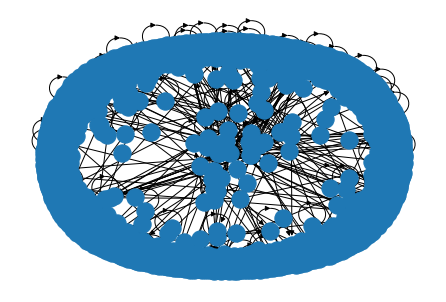

In [17]:
Neti = ABM(combined_nets)
Neti.run_model()
nx.draw(Neti.network)

In [18]:
for key, item in Neti.agents.items():
    if item != 100:
        print(key, ": ", item)

ASEAN Agreement On Transboundary Haze Pollution :  115.0
ASEAN Agreement on Disaster Management and Emergency Response :  85.0
Accord establishing a uniform river regime and creating CICOS :  175.0
Act Regarding Navigation And Economic Cooperation Between The States Of The Niger Basin :  137.5
Additional Protocol To The Convention On Third Party Liability In The Field Of Nuclear Energy :  302.4285714285714
Additional Protocol To The Convention Supplementary To The Convention On Third Party Liability In The Field Of Nuclear Energy :  24.5
Additional Protocol To The European Convention For The Protection Of Animals During International Transport :  40.0
Additional Protocol To The European Outline Convention On Transfrontier Cooperation Between Territorial Communities Or Authorities :  89.82142857142857
Additional Protocol on  Cooperation and Assistance in Environmental Emergencies to the Agreement On An Environmental Framework Of Mercosur :  25.0
Additional Protocol to the Abidjan Conven

Protocol on Environmental Impact Assessment in a Transboundary Context to the Framework Convention for the Protection of the Marine Environment of the Caspian Sea :  30.0
Protocol on Hazardous and Noxious Substances Pollution, Preparedness, Response and Cooperation in the Pacific Region to the Convention for the Protection of the Natural Resources and Environment of the South Pacific Region :  22.5
Protocol on Inserting Amendments and Addenda to the Agreement On The Use Of Water And Energy Resources Of The Syr Darya Basin :  25.0
Protocol on Integrated Coastal Zone Management in the Mediterranean :  26.607142857142854
Protocol on Methods of Coordination of Surveillance Operations to the Convention Under The Sub-Regional Commission On Fisheries On Cooperation In The Exercise Of The Rights Of Maritime Pursuit :  40.0
Protocol on Oil Pollution Preparedness, Response and Cooperation in the Pacific Region to the Convention for the Protection of the Natural Resources and Environment of the S

In [26]:
"""
ANALYZE NETWORK
RETURNS AND PRINTS THE NETWORK ANALYSIS
"""
#enter a networkx class network into the function and receive all the output printed
#and returned as a dictionary

#source for inspiration: https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python#metrics-available-in-networkx

def analyze_network(network):
    output_dict = {}
    output_dict["Density"] = nx.density(network)
    
    degree_dict = dict(network.degree(network.nodes()))
    avg_degree = []
    for key, item in degree_dict.items():
        avg_degree.append(item)
    avg_degree = np.mean(avg_degree)
    output_dict["Average Degree"] = avg_degree
    output_dict["Average Clustering"] = nx.average_clustering(network)
    output_dict["Transitivity"] = nx.transitivity(network)
    output_dict["Number of Nodes"] = len(network.nodes)
    output_dict["Number of Edges"] = len(network.edges)
        
    nx.set_node_attributes(network, degree_dict, 'degree')
    output_dict["Degree Dict"] = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    
    print(output_dict)
    return output_dict
    

In [27]:
"""
RUN CELL TO ANALYZE A NETWORK
THE INPUT HAS TO BE A NETWORKX OBJECT
EXAMPLES OF THAT IN THIS CODE ARE:
    - Stata_Net
    - Decisions_Net
    - ECOLEX_LIST_OF_TREATY_NETWORKS[0] (or any other number, where 0 is the first element year 1970, until the last element)
    - IEA_LIST_OF_TREATY_NETWORKS[0] (or any other number, where 0 is the first element year 1970, until the l

RETURNS AND PRINTS THE NETWORK ANALYSIS
ONE CAN GET A SINGLE VALUES OF THE NETWORK ANALYSIS BY RUNNING THIS CELL AND AFTERWARDS:
network_analysis["name_of_item"]
where the name of the item is the analyzed topic e.g. "Denisty"

"""
network_analysis = analyze_network(Stata_Net)

{'Density': 0.0033067062976035668, 'Average Degree': 5.085714285714285, 'Average Clustering': 0.16446286336122568, 'Transitivity': 0.26112565445026176, 'Number of Nodes': 770, 'Number of Edges': 1958, 'Degree Dict': [('Constitution Of The Food And Agriculture Organization Of The United Nations', 43), ('United Nations Convention On The Law Of The Sea', 42), ('International Convention For The Prevention Of Pollution From Ships', 35), ('Convention On Biological Diversity', 28), ('Protocol On Fisheries To The Treaty Of The Southern African Development Community', 25), ('Convention On International Trade In Endangered Species Of Wild Fauna And Flora', 23), ('International Plant Protection Convention', 22), ('Protocol To Amend The International Convention On Civil Liability For Oil Pollution Damage', 22), ('Convention On The Control Of Transboundary Movements Of Hazardous Wastes And Their Disposal', 20), ('International Convention On Oil Pollution Preparedness, Response And Cooperation', 19)